In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [3]:
ds=pd.read_csv(r"C:\Users\guna5\OneDrive\Desktop\DATASET\housing.csv")

In [4]:
df=pd.DataFrame(ds)
print(df.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [6]:
print(df.shape)

(20640, 10)


In [7]:
df.fillna(df.mean(),inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


C:\Users\guna5\AppData\Local\Temp\ipykernel_12872\2545296668.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(),inplace=True)


In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder
print(df['ocean_proximity'].values)
x=ds.iloc[:,:-1]
y=ds.iloc[:,-1]
print(x)
print(y)

['NEAR BAY' 'NEAR BAY' 'NEAR BAY' ... 'INLAND' 'INLAND' 'INLAND']
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0      

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train)
print(y_train)
print(x_test)
print(y_test)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1989     -119.79     36.73                52.0        112.0       28.000000   
256      -122.21     37.77                43.0       1017.0      328.000000   
7887     -118.04     33.87                17.0       2358.0      396.000000   
4581     -118.28     34.06                17.0       2518.0     1196.000000   
1993     -119.81     36.73                50.0        772.0      194.000000   
...          ...       ...                 ...          ...             ...   
13123    -121.26     38.27                20.0       1314.0      229.000000   
19648    -120.89     37.48                27.0       1118.0      195.000000   
9845     -121.90     36.58                31.0       1431.0      537.870553   
10799    -117.93     33.62                34.0       2125.0      498.000000   
2732     -115.56     32.80                15.0       1171.0      328.000000   

       population  households  median_income  media

In [10]:
print(df['ocean_proximity'].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


In [11]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="entropy",random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
y_pred=dt.predict(x_test)
print(y_pred)

['NEAR OCEAN' '<1H OCEAN' 'INLAND' ... '<1H OCEAN' 'INLAND' '<1H OCEAN']


In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[2699   34    0    8   26]
 [  25 1949    0    0    1]
 [   0    0    3    0    0]
 [   2    0    0  656   10]
 [  29    0    0    5  745]]


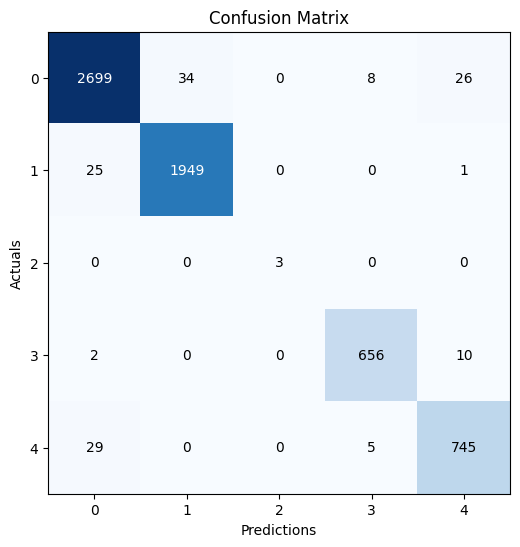

In [14]:
from mlxtend.plotting import plot_confusion_matrix
fig,ax=plot_confusion_matrix(conf_mat=cm,figsize=(6,6),cmap=plt.cm.Blues)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [15]:
acc=accuracy_score(y_test,y_pred)
print(acc)

0.977390180878553


In [16]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

   <1H OCEAN       0.98      0.98      0.98      2767
      INLAND       0.98      0.99      0.98      1975
      ISLAND       1.00      1.00      1.00         3
    NEAR BAY       0.98      0.98      0.98       668
  NEAR OCEAN       0.95      0.96      0.95       779

    accuracy                           0.98      6192
   macro avg       0.98      0.98      0.98      6192
weighted avg       0.98      0.98      0.98      6192



In [17]:
new=pd.DataFrame([[-118.31,34.28,34.0,3258.0,610.0,1810.0,633.0,5.1145,219900.0]])

In [18]:
print(dt.predict(new))

['<1H OCEAN']


C:\Users\guna5\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
